## Présentation du sujet

Le but du projet est de définir si deux questions sont similaires ou non.
Pour cela, nous avons à notre disposition une base de données composée de paires de questions issues du site 'Quora'.

In [2]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import nltk
#sur une console python, import nltk, nltk.download puis télécharger les corpus nécessaires
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

In [4]:
#on importe les données
quora = pd.read_csv('C:\\M2\\MachineLearning\\Quora\\train.csv', delimiter=',')

In [5]:
quora.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


## Statistique Descriptive

Chaque observation comporte 2 paires de questions. Les autres colonnes sont l'id de l'observation, l'id de la question 1, l'id de la question 2 et enfin un booléen 'is_duplicate' qui vaut 1 si les questions sont similaires, 0 sinon.

n_obs  = 404290
n_obs sans duplicats  = 404290
is_duplicate
0    255027
1    149263
dtype: int64


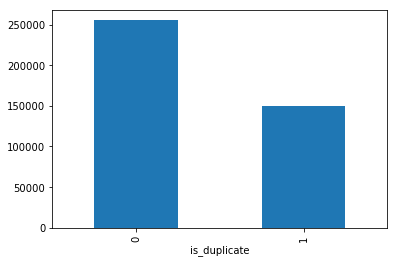

In [6]:
#nombre de paires de questions
n_obs = quora.shape[0]
print("n_obs  = %d" %n_obs)

#on enlève les duplicats (les paires qui sont présentes plus d'une fois) 
quora.drop_duplicates(inplace=True)
n_obs = quora.shape[0]
print("n_obs sans duplicats  = %d" %n_obs)

#proportion de 0 et de 1
print(quora.groupby(['is_duplicate']).size())
quora.groupby(['is_duplicate']).size().plot.bar()
plt.show()

n_obs_train  = 404290
is_duplicate
0    203943
1    119489
dtype: int64


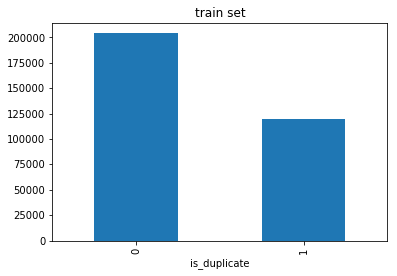

In [8]:
#on va diviser notre base de données en une base d'apprentissage et une base de test

from sklearn.model_selection import train_test_split
train, test = train_test_split(quora, test_size = 0.2)

#nombre de paires de questions
n_obs_train = quora.shape[0]
print("n_obs_train  = %d" %n_obs_train)

#proportion de 0 et de 1
print(train.groupby(['is_duplicate']).size())
train.groupby(['is_duplicate']).size().plot.bar(title='train set')
plt.show()

In [ ]:
#nombre de paires de questions
n_obs_test = quora.shape[0]
print("n_obs_train  = %d" %n_obs_train)

#proportion de 0 et de 1
print(train.groupby(['is_duplicate']).size())
train.groupby(['is_duplicate']).size().plot.bar(title='train set')
plt.show()

In [56]:
stopwords = nltk.corpus.stopwords.words('english') 
#nous allons retirer not des stopwords et ajouter '?' / ou signes de ponctuation en général
stopwords.remove('not')
stopwords.append('?')
#print(stopwords)

In [61]:
sentence1 = quora['question1'][0]
s1 = nltk.word_tokenize(sentence1)
s_1=[]
for s in s1:
    if s.lower() not in stopwords:
        s_1.append(s)

In [58]:
s_1

['step', 'step', 'guide', 'invest', 'share', 'market', 'india']

In [18]:
#fonction qui retourne la 'racine' du mot 
#si c'est un nom, renvoyer nom générique, si verbe, renvoyer l'infinitif

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
print(wordnet_lemmatizer.lemmatize('dogs',pos='n'))
print(wordnet_lemmatizer.lemmatize('is',pos='v'))

dog
be


In [28]:
#synonymes d'un mot
from itertools import chain
synonyms = wn.synsets('small')
lemmas = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
print(lemmas)

{'lowly', 'small', 'modest', 'pocket-size', 'pocket-sized', 'minuscule', 'diminished', 'small-scale', 'low', 'little', 'minor', 'belittled', 'humble'}
